In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from scipy.stats import ttest_ind,bartlett


import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#Set general style of plots(optional)
mpl.style.use(['seaborn'])

#sys.path.append("/home/gari/Desktop/master_tesis_v2/")
from OFHandlers import OFHandlers as OFH

subjects_12=OFH.load_object("./subjects_12.file")

In [2]:
experiments_summary=pd.read_excel('./EXPERIMENT_CONTROL.xlsx', sheet_name="Results").set_index("ID_experiment")
experiments_summary

,counter,pre_processing,Features,Raw accu,Ajus accu,f1_score_,recall___,precision,Machine_learning_technique,Transformation,train score,path
ID_experiment,,,,,,,,,,,,
ID_1,1,clustering K=11,delta,0.539700,0.593000,0.705000,0.608000,0.840000,XGB,none,1.0000,/media/gari/extra_ssd/ordered_experiment/brain...
ID_2,2,clustering K=11,delta_theta,0.577103,0.627907,0.733333,0.637681,0.862745,XGB,polynomial,0.9395,/media/gari/extra_ssd/ordered_experiment/brain...
ID_3,3,clustering K=11,delta_theta_alpha,0.483645,0.569767,0.694215,0.608696,0.807692,RF,none,0.9479,/media/gari/extra_ssd/ordered_experiment/brain...
ID_4,4,clustering K=11,delta_theta_alpha_beta,0.530374,0.616200,0.720000,0.637600,0.840000,RF,Clustering K 72,0.9800,/media/gari/extra_ssd/ordered_experiment/brain...
ID_5,5,clustering K=11,entropy,0.530000,0.590000,0.700000,0.590000,0.854100,RF,none,0.9800,/media/gari/extra_ssd/ordered_experiment/brain...
ID_6,6,clustering K=11,delta_entropy,0.539700,0.510000,0.650000,0.560000,0.760000,XGB,none,0.9200,/media/gari/extra_ssd/ordered_experiment/brain...
ID_7,7,clustering K=11,delta_theta_entropy,0.570000,0.600000,0.734300,0.681000,0.796000,XGB,none,0.6080,/media/gari/extra_ssd/ordered_experiment/brain...
ID_8,8,clustering K=11,delta_theta_alpha_entropy,0.530000,0.530000,0.660000,0.560000,0.790000,XGB,none,1.0000,/media/gari/extra_ssd/ordered_experiment/brain...
ID_9,9,clustering K=11,delta_theta_alpha_beta_entropy,0.540000,0.550000,0.670000,0.570000,0.810000,XGB,Clustering K 56,0.8600,/media/gari/extra_ssd/ordered_experiment/brain...


In [3]:
def get_predictions_exp(id):
    df=pd.read_excel('./EXPERIMENT_CONTROL.xlsx', sheet_name=id)
    df["test_patient_id"]=df["test_patient_id"].str.strip()
    df=df.set_index("test_patient_id")
    test_subject_analysis=df.join(subjects_12)
    highest=str(test_subject_analysis[['Predicted_Target',"DX_01"]].sort_values(by=['Predicted_Target'],ascending=False)[0:3])
    lowest=str(test_subject_analysis[['Predicted_Target',"DX_01"]].sort_values(by=['Predicted_Target'],ascending=True)[0:3])
    return test_subject_analysis,highest,lowest

def generate_plots(df,title,by_c="Sex",by_2c="Age",size=(17,9),rot=90):
    """
    Generete distributions plot
    for visual exploration.
    """
    fig=plt.figure(figsize=size)

    ax0=fig.add_subplot(2,2,1)
    ax1=fig.add_subplot(2,2,2)

    ax2=fig.add_subplot(2,2,3)
    ax3=fig.add_subplot(2,2,4)
    
    colors_list=sns.color_palette("RdBu", len(df[by_c].unique())+3)
    #colors_list.reverse()

    df[by_c].value_counts().plot(kind="pie",
                                  autopct='%1.1f%%',
                                  startangle=rot,
                                  shadow=True,
                                  ax=ax0,colors=colors_list)
    ax0.set_ylabel('')
    
    
    df[[by_2c,by_c]].boxplot(by=by_c,ax=ax3, rot=90)
    ax3.set_xlabel('')
    
    
    df[by_c].value_counts().plot(kind="bar",ax=ax2,color=colors_list)
    #df[by_c].value_counts().plot(kind="bar",ax=ax2)
    
    
    i=0
    for label, df_in in df[[by_2c,by_c]].groupby(by_c):
        try:
            if(label=="ADHD-Hyperactive/Impulsive Type"):
                pass
            elif(label=="No Diagnosis Given"):
                sns.distplot(df_in[by_2c],
                             bins=10 ,
                             ax=ax1,
                             label=label,
                             kde=False,
                             hist_kws={"alpha": 0.5},
                             color="black")
            else:
                sns.distplot(df_in[by_2c],
                             bins=10,
                             ax=ax1,
                             label=label,
                             kde=False,
                             hist_kws={"alpha": 0.4},
                             color=colors_list[i])
        except:
            pass
        i=i+1

    ax1.legend()
    #ax1.set_title("Subjects Gender %. Age < 18")
    ax0.set_title("distribution by "+by_c+" total: "+str(len(df)))
    #plt.title(title)
    fig.suptitle(title, fontsize=14)
    #plt.legend(['u','v','u+v'])
    

    
def execute_test(by_c,by_2c,df_focus,mode):
    labels=[]
    skip_index=0
    for label, df in df_focus[[by_2c,by_c]].groupby(by_c):
        #print(df,label)
        for index,element in enumerate(df_focus[[by_2c,by_c]].groupby(by_c)):
            label2,df2=element[0],element[1]
            if label!=label2 and index>=skip_index:
                if mode=="mean":
                    print("t-test on:",label,label2)
                    t_test=ttest_ind(df.Predicted_Target,df2.Predicted_Target,equal_var=False)
                    print(t_test)
                    print("mean prediction for :",label,df.Predicted_Target.mean())
                    print("mean prediction for :",label2,df2.Predicted_Target.mean())
                    print("*"*100)
                if mode=="var":
                    print("bartlett on:",label,label2)
                    t_test=bartlett(df.Predicted_Target,df2.Predicted_Target)
                    print(t_test)
                    print("variance prediction for :",label,df.Predicted_Target.var())
                    print("variance prediction for :",label2,df2.Predicted_Target.var())
                    print("*"*100)
        skip_index=skip_index+1

In [4]:
    
def generate_plots_algo(df_metrics,df,title,hightest,lowest,by_c="DX_01",by_2c="Predicted_Target",size=(17,9)):
    """
    Generete distributions plot
    for visual exploration.
    """
    fig=plt.figure(figsize=size)

    ax1=fig.add_subplot(1,1,1)
    #ax1=fig.add_subplot(1,2,2)
    
    colors_list=sns.color_palette("RdBu", len(df[by_c].unique())+3)
    #colors_list.reverse()
    
    #df_metrics.plot(kind="barh",ax=ax0,color=colors_list)
    
    i=0
    for label, df_in in df[[by_2c,by_c]].groupby(by_c):
        try:
            if(label=="ADHD-Hyperactive/Impulsive Type"):
                pass
            elif(label=="No Diagnosis Given"):
                sns.distplot(df_in[by_2c],
                             bins=10 ,
                             ax=ax1,
                             label=label,
                             kde=False,
                             hist_kws={"alpha": 0.5},
                             color="black")
            else:
                sns.distplot(df_in[by_2c],
                             bins=25,
                             ax=ax1,
                             label=label,
                             kde=False,
                             hist_kws={"alpha": 0.4},
                             color=colors_list[i])
        except:
            pass
        i=i+1
    ax1.set_xlim(0.0, 1.0)
    ax1.set_ylim(0, 14)
    
    ax1.axvline(x=0.5, color='r', linestyle='--')
    
    ax1.annotate(str(df_metric.round(2).T),xy=(0.1,10))
    ax1.annotate(str(hightest),xy=(0.6,10))
    ax1.annotate(str(lowest),xy=(0.6,5))
    
    ax1.legend()
    #ax1.set_title("Subjects Gender %. Age < 18")
    #ax0.set_title("distribution by "+by_c+" total: "+str(len(df)))
    #plt.title(title)
    fig.suptitle(title, fontsize=14)
    ax1.grid(True)
    #plt.legend(['u','v','u+v'])

In [17]:
def get_predictions_exp(list_id):
    for index,each_id in enumerate(list_id):
        df=pd.read_excel('./EXPERIMENT_CONTROL.xlsx', sheet_name=each_id)
        df["test_patient_id"]=df["test_patient_id"].str.strip()
        df=df.set_index("test_patient_id")
        if index==0:
            df_holder=df
        else:
            df_holder=df_holder.join(df[["Predicted_Target","ajusted_decision"]],lsuffix="_"+each_id)
            
    df_holder=df_holder.rename(columns={"Predicted_Target":"Predicted_Target_ID_1",
                                        "ajusted_decision":"ajusted_decision_ID_1"})
    return df_holder
            
    

In [18]:
list_id=experiments_summary.index
df_expe=get_predictions_exp(list_id)

In [19]:
df_expe

,Predicted_Target_ID_2,target,ajusted_decision_ID_2,Predicted_Target_ID_3,ajusted_decision_ID_3,Predicted_Target_ID_4,ajusted_decision_ID_4,Predicted_Target_ID_5,ajusted_decision_ID_5,Predicted_Target_ID_6,...,Predicted_Target_ID_36,ajusted_decision_ID_36,Predicted_Target_ID_37,ajusted_decision_ID_37,Predicted_Target_ID_38,ajusted_decision_ID_38,Predicted_Target_ID_39,ajusted_decision_ID_39,Predicted_Target_ID_1,ajusted_decision_ID_1
test_patient_id,,,,,,,,,,,,,,,,,,,,,
NDARAA117NEJ,0.785097,1,1,0.728183,1,0.500000,1,0.399524,0,0.370432,...,0.500,1,0.515630,1,0.402041,0,0.442,0,0.491285,0
NDARAY238DFL,0.747251,1,1,0.600490,1,0.433333,0,0.443333,0,0.537846,...,0.516,1,0.471671,0,0.411395,0,0.500,1,0.486192,0
NDARBM839WR5,0.413890,1,0,0.533420,1,0.600000,1,0.362500,0,0.517869,...,0.522,1,0.504422,1,0.497075,0,0.540,1,0.488560,0
NDARBV364MBC,0.214092,1,0,0.243141,0,0.000000,0,0.712222,1,0.508177,...,0.472,0,0.456165,0,0.235884,0,0.334,0,0.705911,1
NDARCB370UK4,0.485152,1,0,0.345616,0,0.400000,0,0.454960,0,0.510170,...,0.506,1,0.517850,1,0.571361,1,0.468,0,0.510198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDARYH480GTD,0.613970,0,1,0.425811,0,0.700000,1,0.503056,1,0.517152,...,0.496,0,0.503711,1,0.474830,0,0.572,1,0.571487,1
NDARYU575CE2,0.727264,1,1,0.664754,1,0.600000,1,0.568234,1,0.480575,...,0.574,1,0.526948,1,0.809524,1,0.590,1,0.652602,1
NDARYU620RH9,0.382466,0,0,0.434614,0,0.400000,0,0.619940,1,0.468120,...,0.466,0,0.512677,1,0.526088,1,0.514,1,0.330548,0


In [41]:
selection_cols=["ajusted_decision_ID_"+str(each) for each in range(1,31)]
selection_cols.append("target")


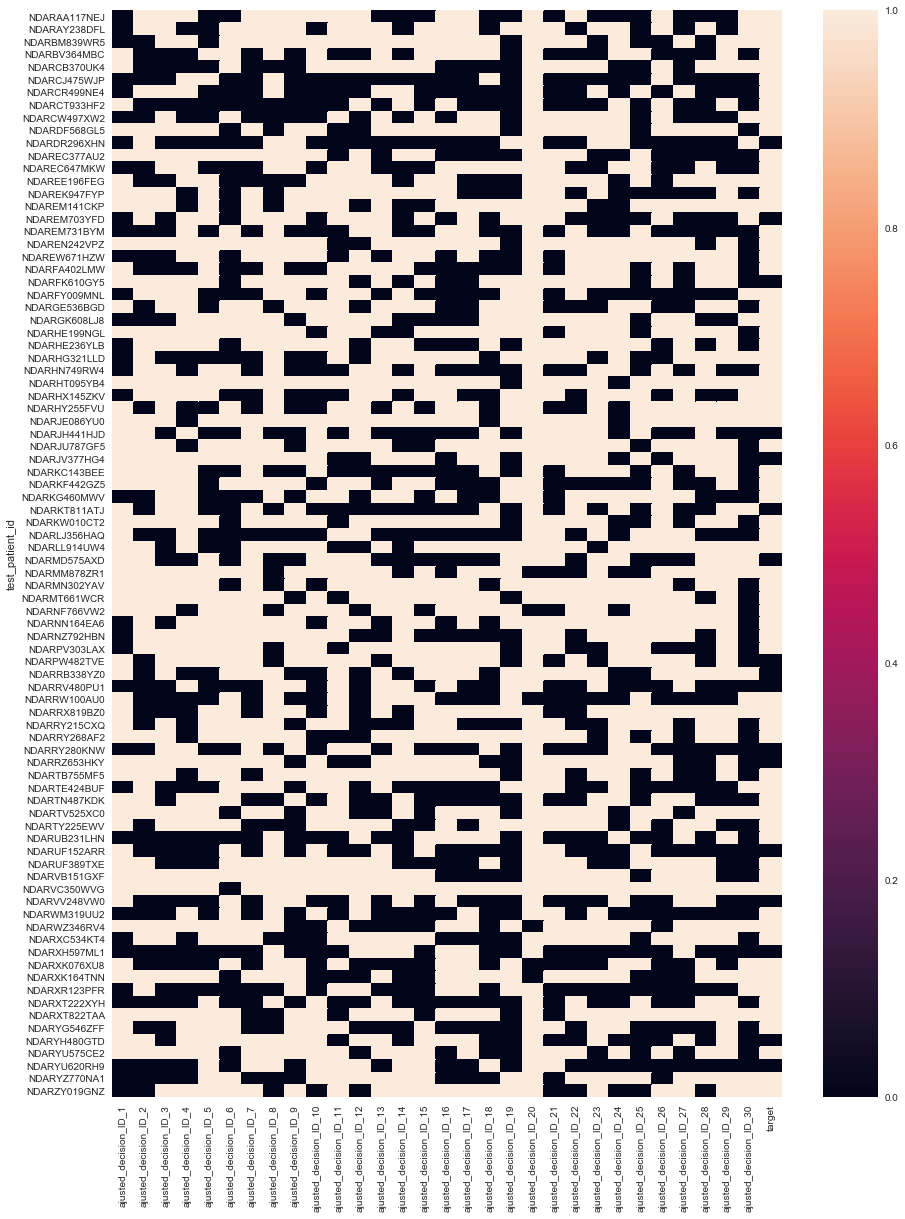

In [42]:
fig=plt.figure(figsize=(15,20))
ax=fig.add_subplot(1,1,1)
sns.heatmap(df_expe[selection_cols],ax=ax)

In [131]:
ajusted_dec=df_expe[selection_cols]
list_cols_a=ajusted_dec.columns

hold_df=ajusted_dec.copy()
rem_col=[]
for each_col in list_cols_a:
    
    if each_col != "target":
        string_new_col="miss_classification_"+"_".join(each_col.split("_")[-2:])
        #print(string_new_col)
        hold_df[string_new_col]=abs(ajusted_dec[each_col]-ajusted_dec["target"])
        rem_col.append(string_new_col)
hold_df=hold_df[rem_col]
    

In [132]:
hold_df.shape

(86, 30)

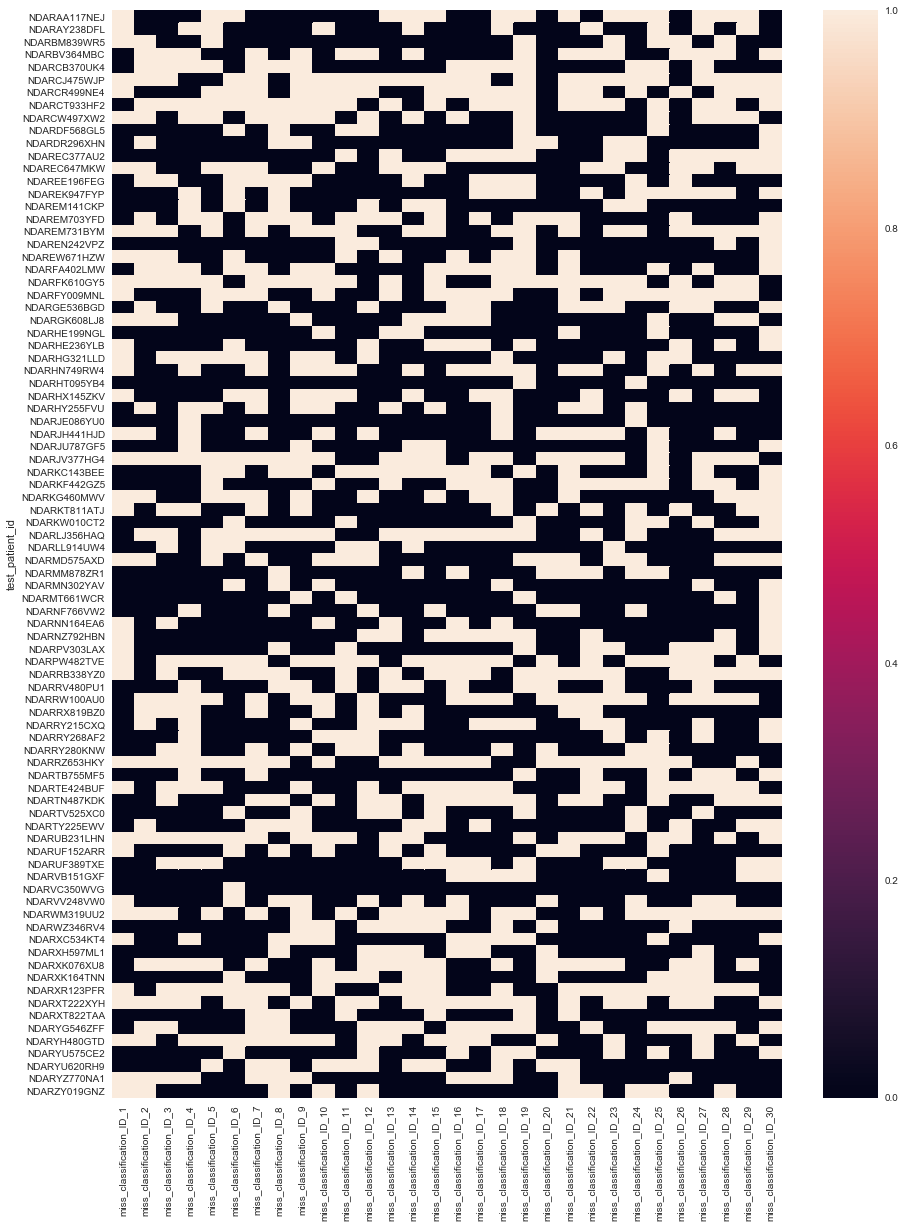

In [127]:
fig=plt.figure(figsize=(15,20))
ax=fig.add_subplot(1,1,1)
sns.heatmap(hold_df,ax=ax)

In [130]:
test_subject_analysis=hold_df.join(subjects_12[["DX_01"]])
test_subject_analysis

,miss_classification_ID_1,miss_classification_ID_2,miss_classification_ID_3,miss_classification_ID_4,miss_classification_ID_5,miss_classification_ID_6,miss_classification_ID_7,miss_classification_ID_8,miss_classification_ID_9,miss_classification_ID_10,...,miss_classification_ID_22,miss_classification_ID_23,miss_classification_ID_24,miss_classification_ID_25,miss_classification_ID_26,miss_classification_ID_27,miss_classification_ID_28,miss_classification_ID_29,miss_classification_ID_30,DX_01
test_patient_id,,,,,,,,,,,,,,,,,,,,,
NDARAA117NEJ,1,0,0,0,1,1,0,0,0,0,...,0,1,1,1,0,1,1,1,0,ADHD-Combined Type
NDARAY238DFL,1,0,0,1,1,0,0,0,0,1,...,1,0,0,1,0,1,0,1,0,ADHD-Combined Type
NDARBM839WR5,1,1,0,0,1,0,0,0,0,0,...,0,1,0,1,1,0,1,0,0,ADHD-Hyperactive/Impulsive Type
NDARBV364MBC,0,1,1,1,0,0,1,0,1,0,...,1,1,0,0,1,1,1,0,1,ADHD-Combined Type
NDARCB370UK4,0,1,1,1,1,0,1,1,1,0,...,0,0,1,1,0,1,0,0,0,ADHD-Combined Type
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDARYH480GTD,1,1,0,1,1,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,No Diagnosis Given
NDARYU575CE2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,ADHD-Hyperactive/Impulsive Type
NDARYU620RH9,0,0,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,No Diagnosis Given


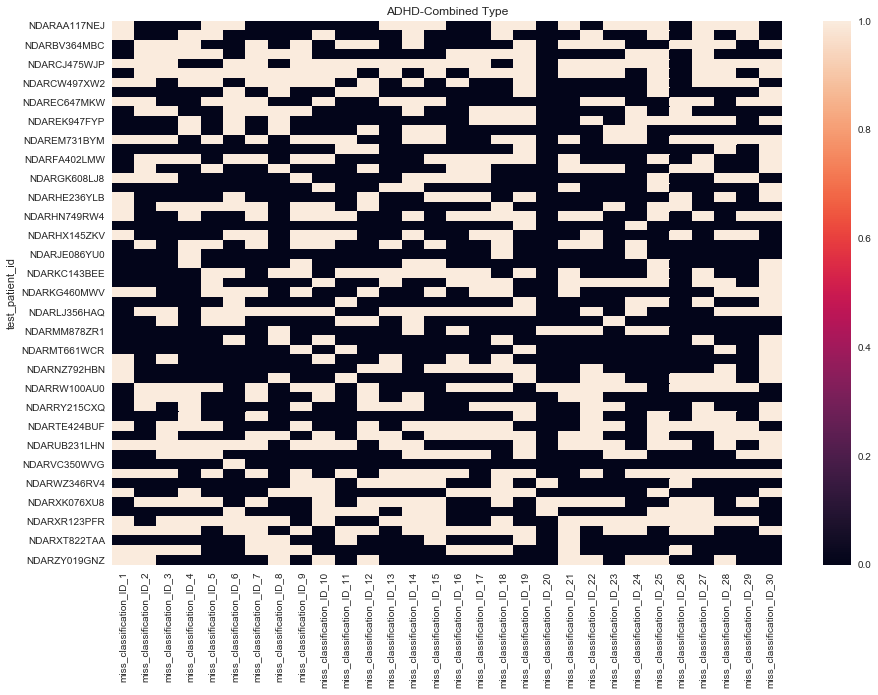

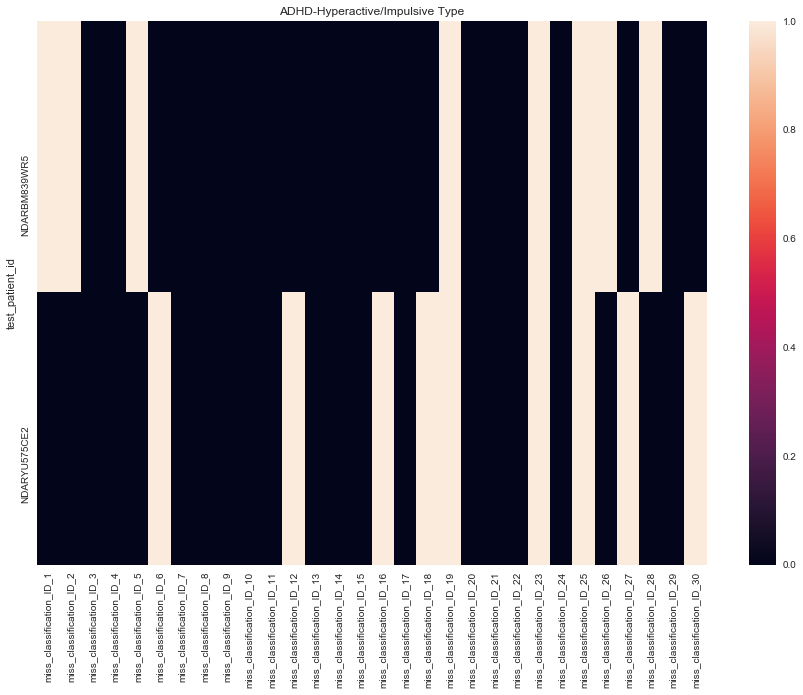

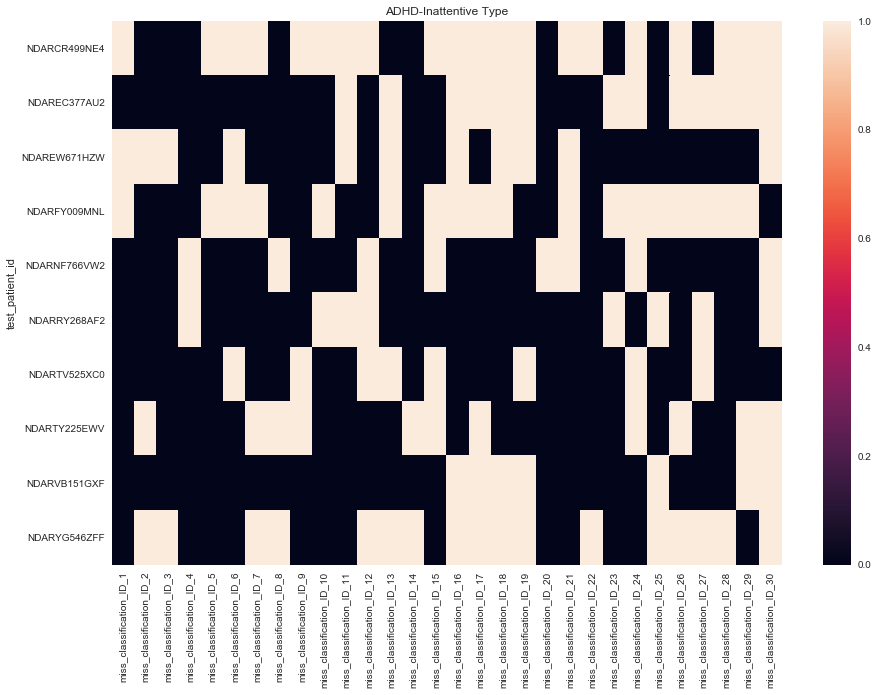

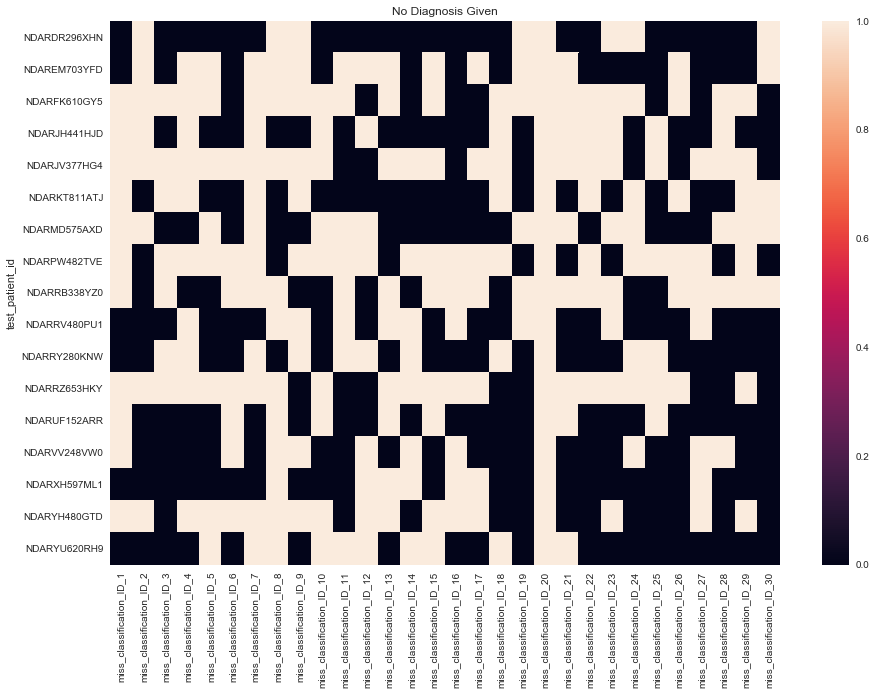

In [150]:
for label,df in test_subject_analysis.groupby("DX_01"):
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot(1,1,1)
    sns.heatmap(df.drop(['DX_01'], axis=1),ax=ax)
    ax.set_title(label)

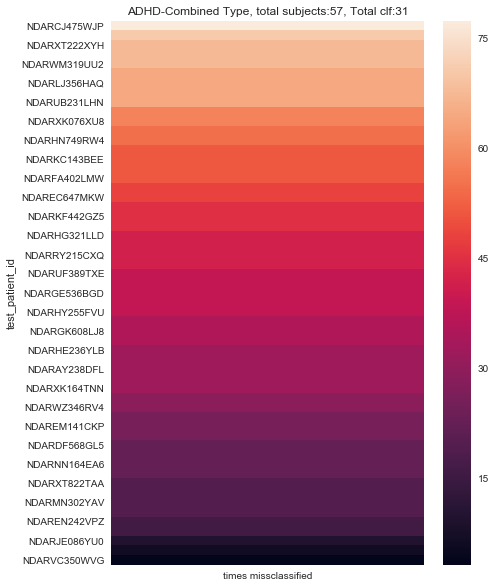

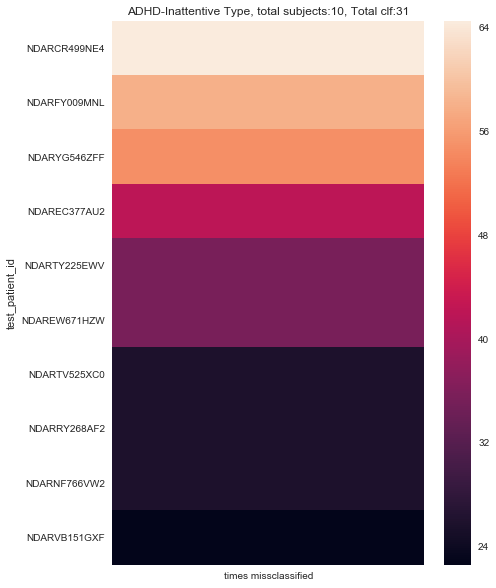

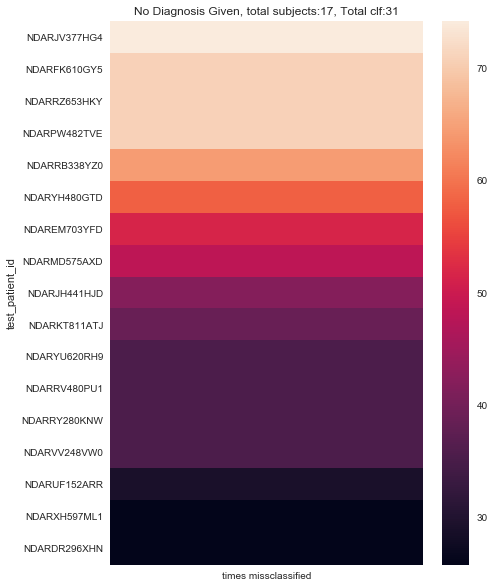

In [198]:
for label,df in test_subject_analysis.groupby("DX_01"):
    if label!="ADHD-Hyperactive/Impulsive Type":
        miss=(df.sum(axis=1)/len(df.columns))*100
        fig=plt.figure(figsize=(7,10))
        ax=fig.add_subplot(1,1,1)
        sns.heatmap(pd.DataFrame(miss.sort_values(ascending=False),columns=["times missclassified"]),ax=ax)
        ax.set_title(label+", total subjects:"+str(len(miss))+ ", Total clf:"+str(len(df.columns))  )